In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from __future__ import division

df = pd.read_csv('projects.csv')

# Exploratory Analysis

The "describe" function summarizes the mean, standard deviation, minimum, maximum and confidence interval values for the numerical variables in the 'projects' dataset. I found the maximum value in the variable "students_reached" to be problematic as it was far greater than the value at 75%. This shows that the upper quartile consists of values that are far beyond the lower quartile and median quartile, which explains why the distribution is right-skewed with a mean value that is closer to the 75% than the median. This could be problematic in making inferences from the variable. 

I also found the distribution of poverty levels, primary focus areas and secondary focus areas in the dataset using a frequency table. This highlighted how the dataset largely consists of individuals in the highest or high poverty levels and that the majority of students' primary or secondary focus areas are in Language & Literacy and Math & Science. Using a histogram, I was also able to discern the proportion of students that were in different grade levels. I found that the majority of students in the dataset consisted in the PreK-2 and 3-5 grades and were thus younger. This explained why the emphasized focus areas were on Language, Literacy, Math and Science as they are subjects that are taught from a very young age - unlike focus areas such as History, Civics, Music and the Arts.

In [20]:
df.describe()

,school_ncesid,school_latitude,school_longitude,school_zip,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached
count,6.213620e+05,664098.000000,664098.000000,664094.000000,629016.000000,6.640980e+05,6.640980e+05,663952.000000
mean,2.608577e+11,37.240948,-93.344760,52926.452644,27.495822,5.420415e+02,6.447128e+02,97.233547
std,1.589754e+11,4.668155,17.761908,31193.738658,8.663046,1.267738e+04,1.545863e+04,2283.327661
min,1.000050e+10,18.249140,-176.634989,410.000000,9.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.000230e+11,34.038082,-112.003213,27589.000000,17.000000,2.672000e+02,3.175000e+02,22.000000
50%,2.615730e+11,37.662476,-87.681219,50702.000000,30.000000,4.110000e+02,4.878400e+02,30.000000
75%,3.704720e+11,40.758827,-79.193091,85043.000000,35.000000,5.864900e+02,6.963875e+02,100.000000
max,6.100009e+11,67.258157,-66.628036,99950.000000,35.000000,1.025002e+07,1.250002e+07,999999.000000


In [15]:
df['poverty_level'].value_counts()

highest poverty     383489
high poverty        173561
moderate poverty     90337
low poverty          16711
Name: poverty_level, dtype: int64

Grades PreK-2    246118
Grades 3-5       204443
Grades 6-8       114539
Grades 9-12       98989
Name: grade_level, dtype: int64

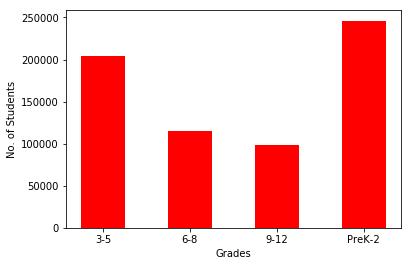

In [69]:
objects = ['PreK-2', '3-5', '6-8', '9-12']
plt.bar(objects, df['grade_level'].value_counts(), width = 0.5, color = 'r')
plt.xlabel('Grades')
plt.ylabel('No. of Students')
df['grade_level'].value_counts()

In [83]:
df['primary_focus_area'].value_counts()

Literacy & Language    298758
Math & Science         164339
Music & The Arts        59893
Applied Learning        49534
Special Needs           41959
History & Civics        31131
Health & Sports         18445
Name: primary_focus_area, dtype: int64

In [84]:
df['secondary_focus_area'].value_counts()

Literacy & Language    162525
Math & Science         110416
Applied Learning        67252
History & Civics        36122
Music & The Arts        35507
Special Needs           28577
Health & Sports         15806
Name: secondary_focus_area, dtype: int64

Applied Learning       116786
Health & Sports         34251
History & Civics        67253
Literacy & Language    461283
Math & Science         274755
Music & The Arts        95400
Special Needs           70536
dtype: int64

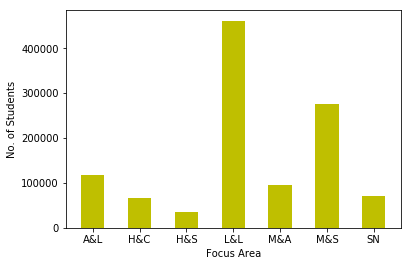

In [92]:
objects = ['A&L', 'H&S', 'H&C', 'L&L', 'M&S', 'M&A', 'SN']
plt.bar(objects, df['primary_focus_area'].value_counts() + df['secondary_focus_area'].value_counts(), width = 0.5, color = 'y')
plt.xlabel('Focus Area')
plt.ylabel('No. of Students')
df['primary_focus_area'].value_counts() + df['secondary_focus_area'].value_counts()

# Data Story

Based on the dataset provided, I thought it would be interesting to investigate the focus areas of students in different poverty levels. I inferred that the proportion of schools that were emphasizing subjects like Language & Literacy would be far more in the highest povery levels than in the lower poverty levels. Further, I felt that schools in the lower poverty levels would emphasize focus areas like Math, Science, History and Civics more than schools in the higher poverty levels. Language & Literacy encompass the most fundamental area of focus that forms the base for further learning and education. Thus, I inferred that this subject would be emphasized in high poverty areas, assuming that students here have a far lower level of expertise than students attending school in lower poverty areas.

Using pie charts, I found that in the highest poverty areas 36.8% of schools had Language & Literacy as a focus area (primary or secondary). This number dipped to 34% in the high poverty areas, 34% again in the moderate poverty areas and down to 31.2% in the low poverty areas. For Math & Science, I saw 20% in the highest poverty, 21.6% in high poverty, 23.7% in moderate poverty and 25% in low poverty. Similarly, for History and Civic we see, 4.2% in the highest poverty, 5.2% in high poverty, moderate poverty and low poverty. This evidence justified my inference showing a clear correlation between poverty level in the schools of the dataset and the focus areas within them. This highlights how impoverished schools are more in need of teaching basic skills like Language & Literacy in comparison to more advanced subjects like Math, Science, History and Civics which are covered more in lower poverty areas.

In [157]:
highest_focus_area = []
high_focus_area = []
moderate_focus_area = []
low_focus_area = []
for i in range(0, len(df)):
    if(df.iloc[i]['poverty_level'] == 'highest poverty'):
        highest_focus_area.append(df.iloc[i]['primary_focus_area'])
        highest_focus_area.append(df.iloc[i]['secondary_focus_area'])
    if(df.iloc[i]['poverty_level'] == 'high poverty'):
        high_focus_area.append(df.iloc[i]['primary_focus_area'])
        high_focus_area.append(df.iloc[i]['secondary_focus_area'])
    if(df.iloc[i]['poverty_level'] == 'moderate poverty'):
        moderate_focus_area.append(df.iloc[i]['primary_focus_area'])
        moderate_focus_area.append(df.iloc[i]['secondary_focus_area'])
    if(df.iloc[i]['poverty_level'] == 'low poverty'):
        low_focus_area.append(df.iloc[i]['primary_focus_area'])
        low_focus_area.append(df.iloc[i]['secondary_focus_area'])
    

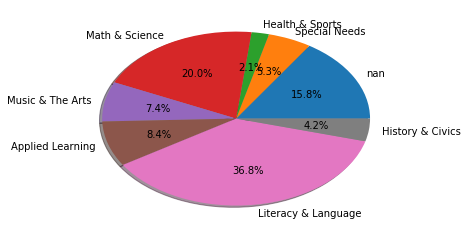

In [154]:
counts = Counter(highest_focus_area)
total = 0
pct = []
labels = []
for x in counts:
    total = total + counts[x]
    labels.append(x)
for x in counts:
    p = (int)((counts[x]/total)*100)
    pct.append(p)
plt.pie(pct, labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()

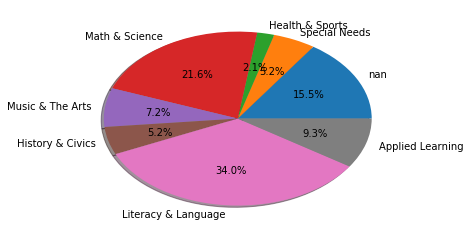

In [155]:
counts = Counter(high_focus_area)
total = 0
pct = []
labels = []
for x in counts:
    total = total + counts[x]
    labels.append(x)
for x in counts:
    p = (int)((counts[x]/total)*100)
    pct.append(p)
plt.pie(pct, labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()

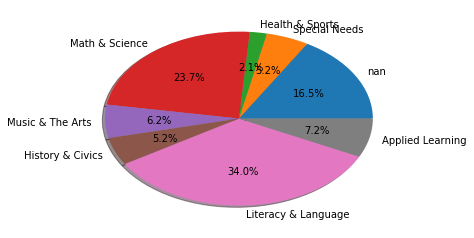

In [156]:
counts = Counter(moderate_focus_area)
total = 0
pct = []
labels = []
for x in counts:
    total = total + counts[x]
    labels.append(x)
for x in counts:
    p = (int)((counts[x]/total)*100)
    pct.append(p)
plt.pie(pct, labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()

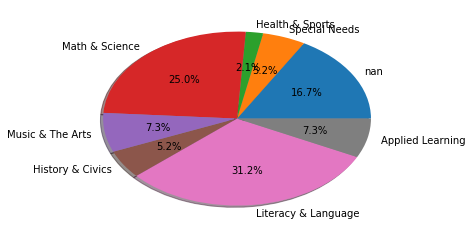

In [150]:
counts = Counter(low_focus_area)
total = 0
pct = []
labels = []
for x in counts:
    total = total + counts[x]
    labels.append(x)
for x in counts:
    p = (int)((counts[x]/total)*100)
    pct.append(p)
plt.pie(pct, labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()

# Questions for the Project Partner

There are plenty of NaN values for focus areas in different schools, encompassing nearly 15-16% of the dataset. My first question would pertain to this missing information as having more data available on focus areas in different schools would help with assessing my data story. I'd also be curious what focus areas like "Special Needs" and "Applied Learning" cover and pertain to, as understanding these values in more detail could give me a better understanding of the dataset. 

I'd also be curious what entails the "Other" value in the resource_type variable as it would be give me more information if I wanted to do a comprehensive resource analysis. 

In [158]:
df['resource_type'].value_counts()

Supplies      229213
Technology    216145
Books         142394
Other          69791
Trips           5499
Visitors        1011
Name: resource_type, dtype: int64